In [1]:
'''
Python Implementation Of Simplex Method For 
Solving Linear Program In Canonical Formulation 
'''

#importing relevant libraries
import numpy as np 
import math 

#Function to choose pivot column, which is the most negative entry of the
#objective row (last row in this implementation) 
def choose_col(table): 
    low = 0
    index = 0
    for i in range(1, table.shape[0]-1):
        if table[table.shape[0]-1,i] < low:
            low = table[table.shape[0]-1,i]
            index = i
    return index

#Function to choose pivot row, which is the least nonnegative entry of the ratio
#between the cRHS and the entry itself, in the chosen pivot column
def choose_row(table, col):
    low = math.inf
    index=-math.inf
    for i in range(0,table.shape[0]-1):
        if low>table[i,table.shape[1]-1]/table[i,col] and table[i,table.shape[1]-1]/table[i,col]>=0:
            low=table[i,table.shape[1]-1]/table[i,col]
            index=i
    return index

#Fucntion to pivot the chosen entry by Gaussian-Jordan elimination between this row and the other
#By construction of the simplex algorithm (the chosen row and column), this elimination will always
#lead to an improved objective function
def pivot(table,step):
    print("At step", step+1)
    print("___Before Pivot:\n", table)
    #retrieve the chosen row and column
    col=choose_col(table)
    row=choose_row(table,col)
    #Substracting the normalized chosen row from other row to have the 
    #reduced row echelon form matrix, which is our new table to pivot 
    #(or the optimal result)
    for i in range(table.shape[0]):
        if i != row: 
            ratio=table[i,col]/table[row,col]
            table[i,:]=table[i,:]-table[row,:]*ratio
    print("___After Pivot:\n", table)
    return table

#Function to check the optimality of the algorithm: if optimality
#is reached, all entries of the objective row will be nonnegative
def optcheck(tab): 
    dummy=np.array(tab[tab.shape[0]-1,])
    if np.all(dummy>=0):
        return True
    else: return False

#Main function for simplex algorithm
def simplex(obj,cLHS,cRHS):
    #checking the input form of the linear program to see if 
    #it fits the allowed type of input
    test=np.matrix([0])
    assert type(obj)==type(test)
    assert type(cLHS)==type(test)
    assert type(cRHS)==type(test)
    #Constructing the canonical simplex matrix
    obj=np.concatenate((-obj,np.zeros((1,cLHS.shape[0]+1))),axis=1)  
    #Adding slack variable, 1 slack for each constraints, 
    #no surplus variable since we assume the simplest canonical form
    slack=np.identity(cLHS.shape[0],dtype=float)
    cLHS=np.concatenate((cLHS,slack),axis=1)
    constraints=np.concatenate((cLHS,cRHS),axis=1)
    tab=np.concatenate((constraints,obj),axis=0)
    #Main loop to find the optimal solution
    i=0
    while optcheck(tab)==False and i<=10000:
        tab=pivot(tab,i)
        i+=1
    if i==10000: 
        print('Infeasible')
    else:
        print('The optimal value of the objective function is:', tab[tab.shape[0]-1,tab.shape[1]-1])

'''
Solving a linear program in canonical form: 
    Maximizing: 2a-b+2c
    Subject to: 2a+b<=10 ; a+2b-2c<=20; b+2b<=5
'''

A=np.matrix([2,-1,2])
B=np.matrix([[2,1,0],[1,2,-2],[0,1,2]])
C=np.matrix([[10],[20],[5]])
simplex(A,B,C)

At step 1
___Before Pivot:
 [[  2.   1.   0.   1.   0.   0.  10.]
 [  1.   2.  -2.   0.   1.   0.  20.]
 [  0.   1.   2.   0.   0.   1.   5.]
 [ -2.   1.  -2.   0.   0.   0.   0.]]
___After Pivot:
 [[  2.   1.   0.   1.   0.   0.  10.]
 [  1.   3.   0.   0.   1.   1.  25.]
 [  0.   1.   2.   0.   0.   1.   5.]
 [ -2.   2.   0.   0.   0.   1.   5.]]
At step 2
___Before Pivot:
 [[  2.   1.   0.   1.   0.   0.  10.]
 [  1.   3.   0.   0.   1.   1.  25.]
 [  0.   1.   2.   0.   0.   1.   5.]
 [ -2.   2.   0.   0.   0.   1.   5.]]
___After Pivot:
 [[  2.    1.    0.    1.    0.    0.   10. ]
 [  0.    2.5   0.   -0.5   1.    1.   20. ]
 [  0.    1.    2.    0.    0.    1.    5. ]
 [  0.    3.    0.    1.    0.    1.   15. ]]
The optimal value of the objective function is: 15.0


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars


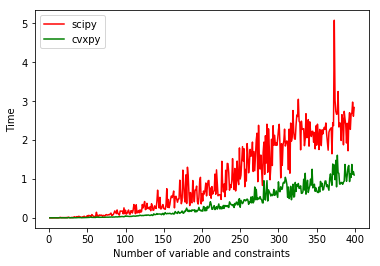

In [10]:
'''
Comparing Linear Program Solvers: 
- My Implementation Of Simplex Method 
- scipy.optimize.linprog Simplex Method
- CVXPY various optimizers
'''

#Importing relevant libraries
import timeit 
from scipy.optimize import linprog as lp
import cvxpy as cvx
import random 
import numpy as np
import matplotlib.pyplot as plt


#Wrapper functions to solve arbitrary large linear programs using 
#randomly generated coefficients
def linprog_simplex(N,M):
    A=np.matrix([random.randint(-100,100) for _ in range(N)])
    B=np.matrix([[random.randint(-100,100) for _ in range(N)] for _ in range(M)])
    C=np.matrix([[random.randint(-12500,25100)] for _ in range(M)])
    simplex(A,B,C)
    
def linprog_scipy(N,M):
    A=[random.randint(-100,100) for _ in range(N)]
    B=[[random.randint(-100,100) for _ in range(N)] for _ in range(M)]
    C=[[[random.randint(-12500,25100)] for _ in range(M)]]
    lp(A,A_ub=B,b_ub=C,method='simplex')

def linprog_cvx(N,M):
    A=np.matrix([random.randint(-100,100) for _ in range(N)])
    B=np.matrix([[random.randint(-100,100) for _ in range(N)] for _ in range(M)])
    C=np.matrix([[random.randint(-12500,25100)] for _ in range(M)])
    x=cvx.Variable(N,1)
    obj=cvx.Minimize(A*x)
    constraint=[B*x<=C,x>=0]
    prob=cvx.Problem(obj,constraint)
    prob.solve()
    
#Wrapper function for timeit module   
def wrap(func, args1,args2):
    def wrapped():
        return func(args1,args2)
    return wrapped


dummy=[]
scipy=[]
cvxpy=[]

for i in range(1,400):
    dummy.append(i)
    scipy.append(timeit.timeit(wrap(linprog_scipy,i,i),number=100)/100)
    cvxpy.append(timeit.timeit(wrap(linprog_cvx,i,i),number=100)/100)
    

plt.plot(dummy,scipy,color='red',label='scipy')
plt.plot(dummy,cvxpy,color='green',label='cvxpy')
plt.legend()
plt.xlabel('Number of variable and constraints')
plt.ylabel('Time')
plt.show()

In [ ]:
'''
Solving The Traveling Salesman Problem Using
Integer Programming
'''
#import relevant libraries 
import cvxpy as cvx
import numpy as np 
import math 
import timeit
import matplotlib.pyplot as plt

#main tsp solver that accepts a matrix distance A as the input
def tsp_integer(A): 
    N=A.shape[0]
    #A Boolean matrix that represents the choice of path
    trip=cvx.Bool(N,N)
    #A column vector to specify constraint (1) and (2)
    aux=np.ones((1,N))
    #An auxiliary nonnegative variable to specify the MTZ condition
    mtz=cvx.Variable(N,1) 
    
    #Objective: minimize the strip, subject to the choice of the Boolean variables
    obj = cvx.Minimize(sum([A[i,:]*trip[:,i] for i in range(N)]))
    #One-in one-out degree constraints
    constraints = [(cvx.sum_entries(trip, axis=0) == aux), 
                   (cvx.sum_entries(trip, axis=1) == aux.transpose())]
    for i in range(N):
        constraints.append(mtz[i] >= 0)
    #MTZ constraints
    for i in range(1,N):
        for j in range(1,N):
            if i != j:
                constraints.append(mtz[i] - mtz[j] + N*trip[i,j] <= N-1)
    #Solve using CVXPY
    problem=cvx.Problem(obj,constraints)
    problem.solve()
    return problem.value

def wrap(func, args):
    def wrapped():
        return func(args)
    return wrapped

dummy=[]
time=[]
for i in range(1,80):
    time.append(timeit.timeit(wrap(tsp_integer,np.identity(i)*100000+np.random.rand(i,i)),number=1)/1)
    dummy.append(i) 
    
plt.plot(dummy,time)
plt.xlabel('Number of vertex')
plt.ylabel('Time')
plt.show()